## Load the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE 

import os

import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from gensim.models import Word2Vec, KeyedVectors #To load the model

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

## Load the model

In [2]:
#model = KeyedVectors.load_word2vec_format('/kaggle/input/training-embeddings-using-gensim/word2vec_cbow.bin')
model = KeyedVectors.load_word2vec_format('/kaggle/input/training-embeddings-using-gensim/word2vec_sg.bin',binary=True)

#model = KeyedVectors.load_word2vec_format('/kaggle/input/training-embeddings-using-gensim/fasttext_cbow.bin', binary=True)
#model = KeyedVectors.load_word2vec_format('/kaggle/input/training-embeddings-using-gensim/fasttext_skipgram.bin', binary=True)

## TSNE
t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.

In [3]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.index_to_key)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary :",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])

#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 111673
Few words in Vocabulary : ['the', 'of', 'and', 'in', 'to', 'was', 'on', 'for', 'is', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'also', 'which', 'are', 'first', 'this', 'be', 'new', 'had', 'has', 'or', 'one', 'after', 'their', 'references', 'her', 'not', 'who', 'she', 'th', 'but', 'two', 'its', 'they', 'have', 'been', 'all', 'time', 'other', 'year', 'when']
Size of Vocabulary without stopwords: 109995
Few words in Vocabulary without stopwords ['references', 'time', 'year', 'school', 'world', 'season', 'university', 'national', 'team', 'state', 'external', 'links', 'united', 'city', 'film', 'st', 'born', 'years', 'league', 'american', 'march', 'south', 'september', 'part', 'north', 'january', 'states', 'john', 'made', 'music']


In [4]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [5]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-0.51213557  0.9777221  -0.26760703  0.08586726  0.41656813 -0.23524652
  0.5174918   0.5222025  -0.7936237  -0.65747184  0.72181904 -0.15098752
 -0.4733261  -0.12436412  0.79948175 -0.16756175  0.00576326 -0.03114053
  0.06303737 -0.10781112  0.40099588  0.06238325  0.12517466  0.17603701
  0.16848397 -0.32180703  0.32108465  0.5693402  -0.60947937 -0.18340747
  0.21196285 -0.08580454  0.34813988  0.42453352 -0.40828165  0.52297443
  0.10164678  0.12076133 -0.13269451  0.13812627 -0.40513098 -0.41532513
  0.29715276  0.17835265 -0.07542021 -0.32570088 -0.27100518 -0.28487828
  0.32787088  0.06096712  0.14554219 -0.21877068 -0.08618619  0.0791218
 -0.12640437  0.3590155  -0.1745923   0.22345626  0.02384777 -0.01110848
 -0.13900903  0.04109811 -0.01293286 -0.425909   -0.4412546   0.14892177
 -0.00114885  0.2565734  -0.37735575  0.2701665  -0.15953285  0.07139426
  0.3319787  -0.35880205 -0.01082382  0.20874494  0.18132977  0.156424
  0.21478173  0.03292177 -0.839445

In [6]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions

## Hyperparameters of TSNE
1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official docs. It is very easy to misread tsne too. This article provides more deatils about it.

In [7]:
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 16), dpi = 500)
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

perplexity : 5


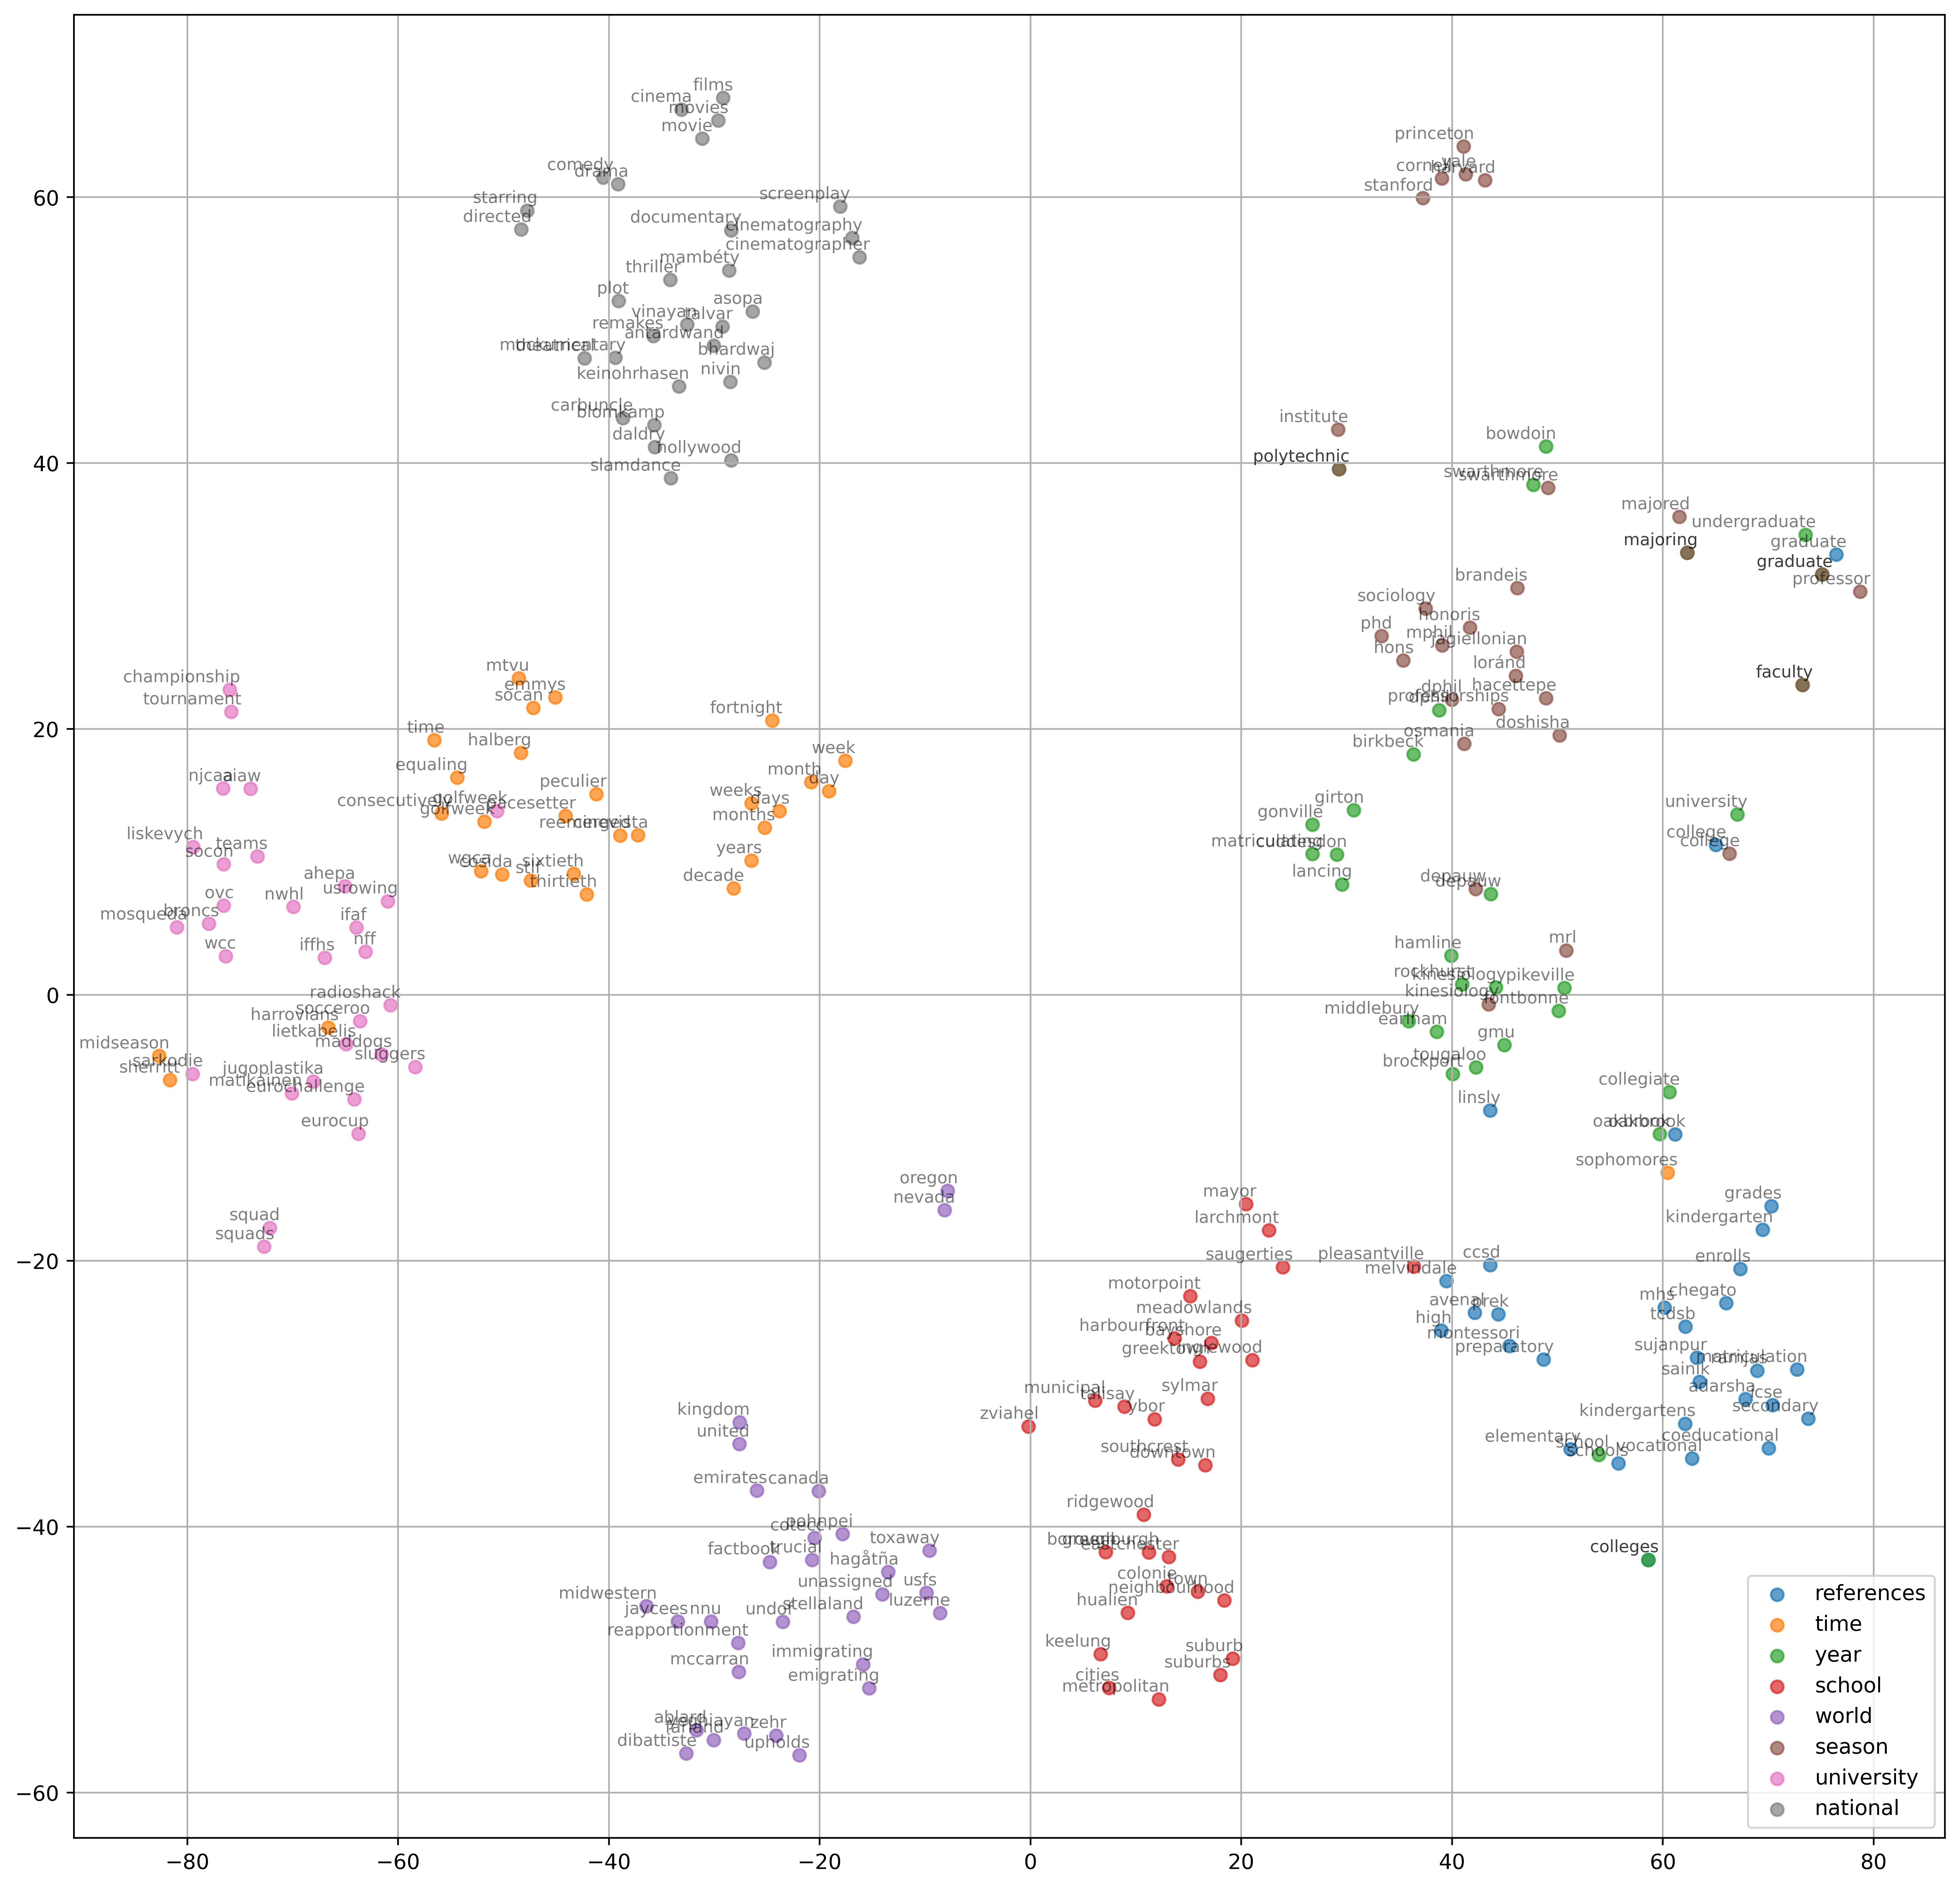

In [8]:
print('perplexity :',5)
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
#reshaping it into 2d so we can visualize it
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) 
# Visulize
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

perplexity : 25


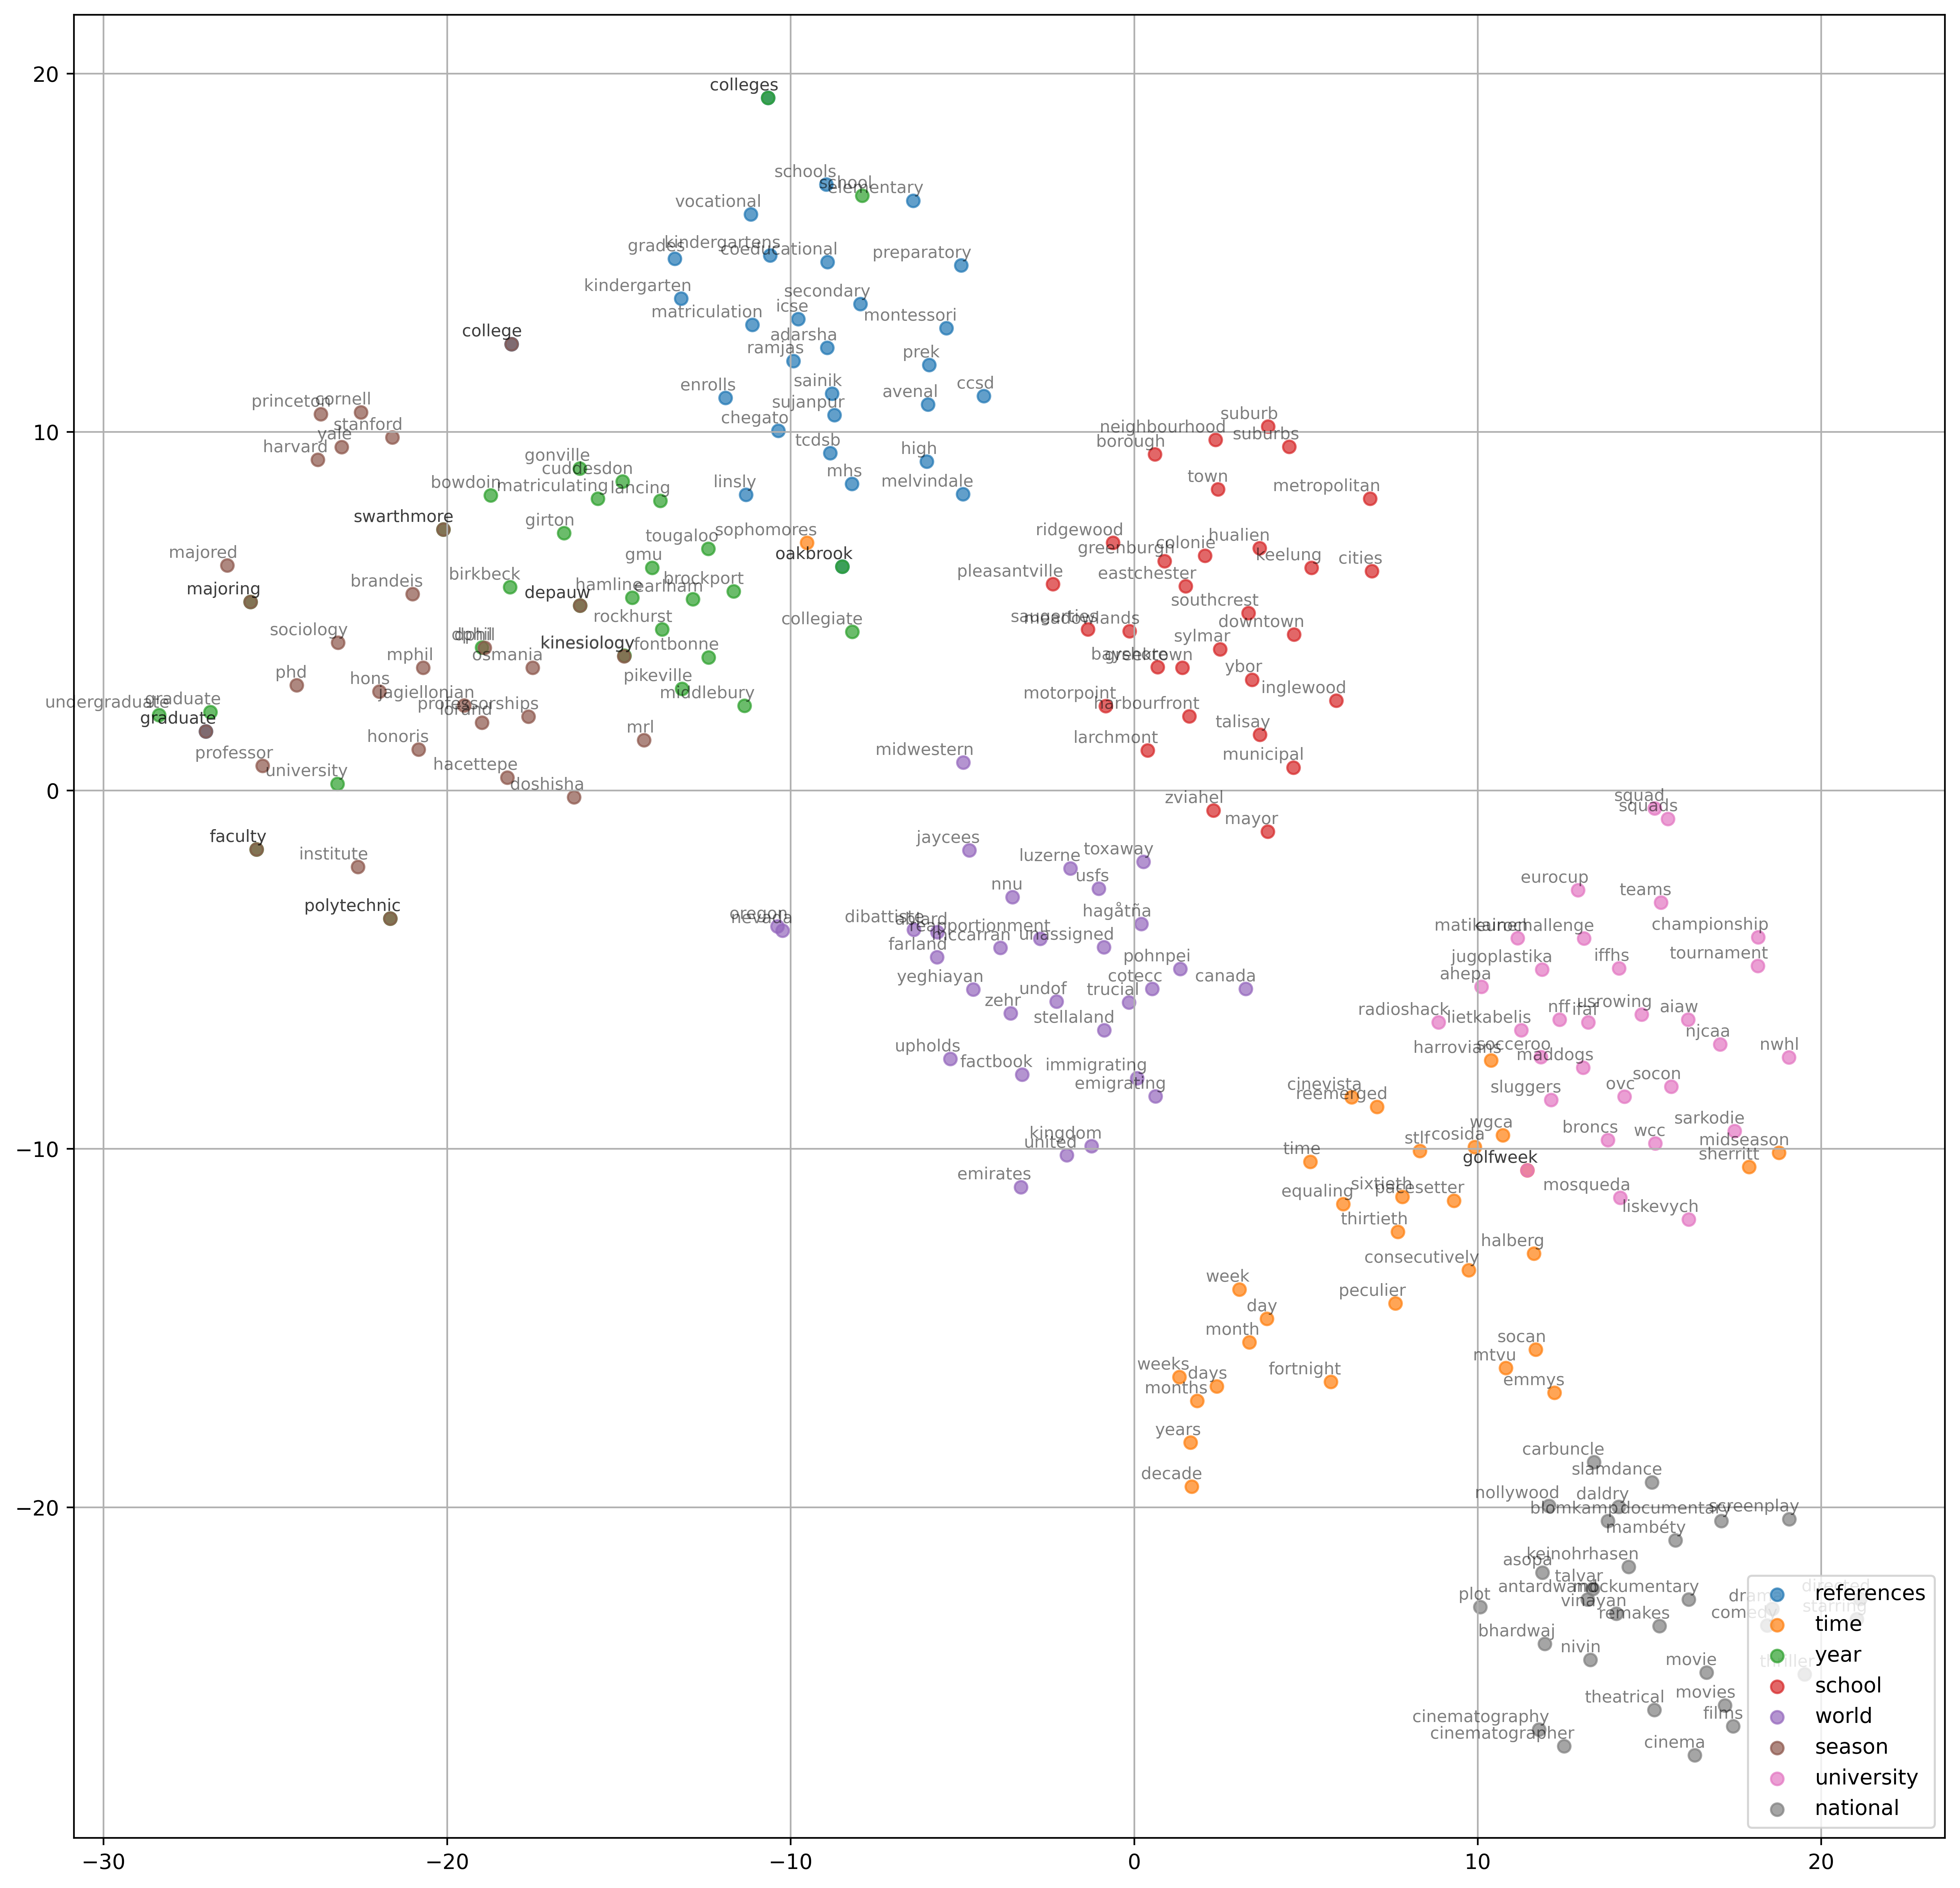

In [9]:
print('perplexity :',25)
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
#reshaping it into 2d so we can visualize it
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) 
# Visulize
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

perplexity : 10


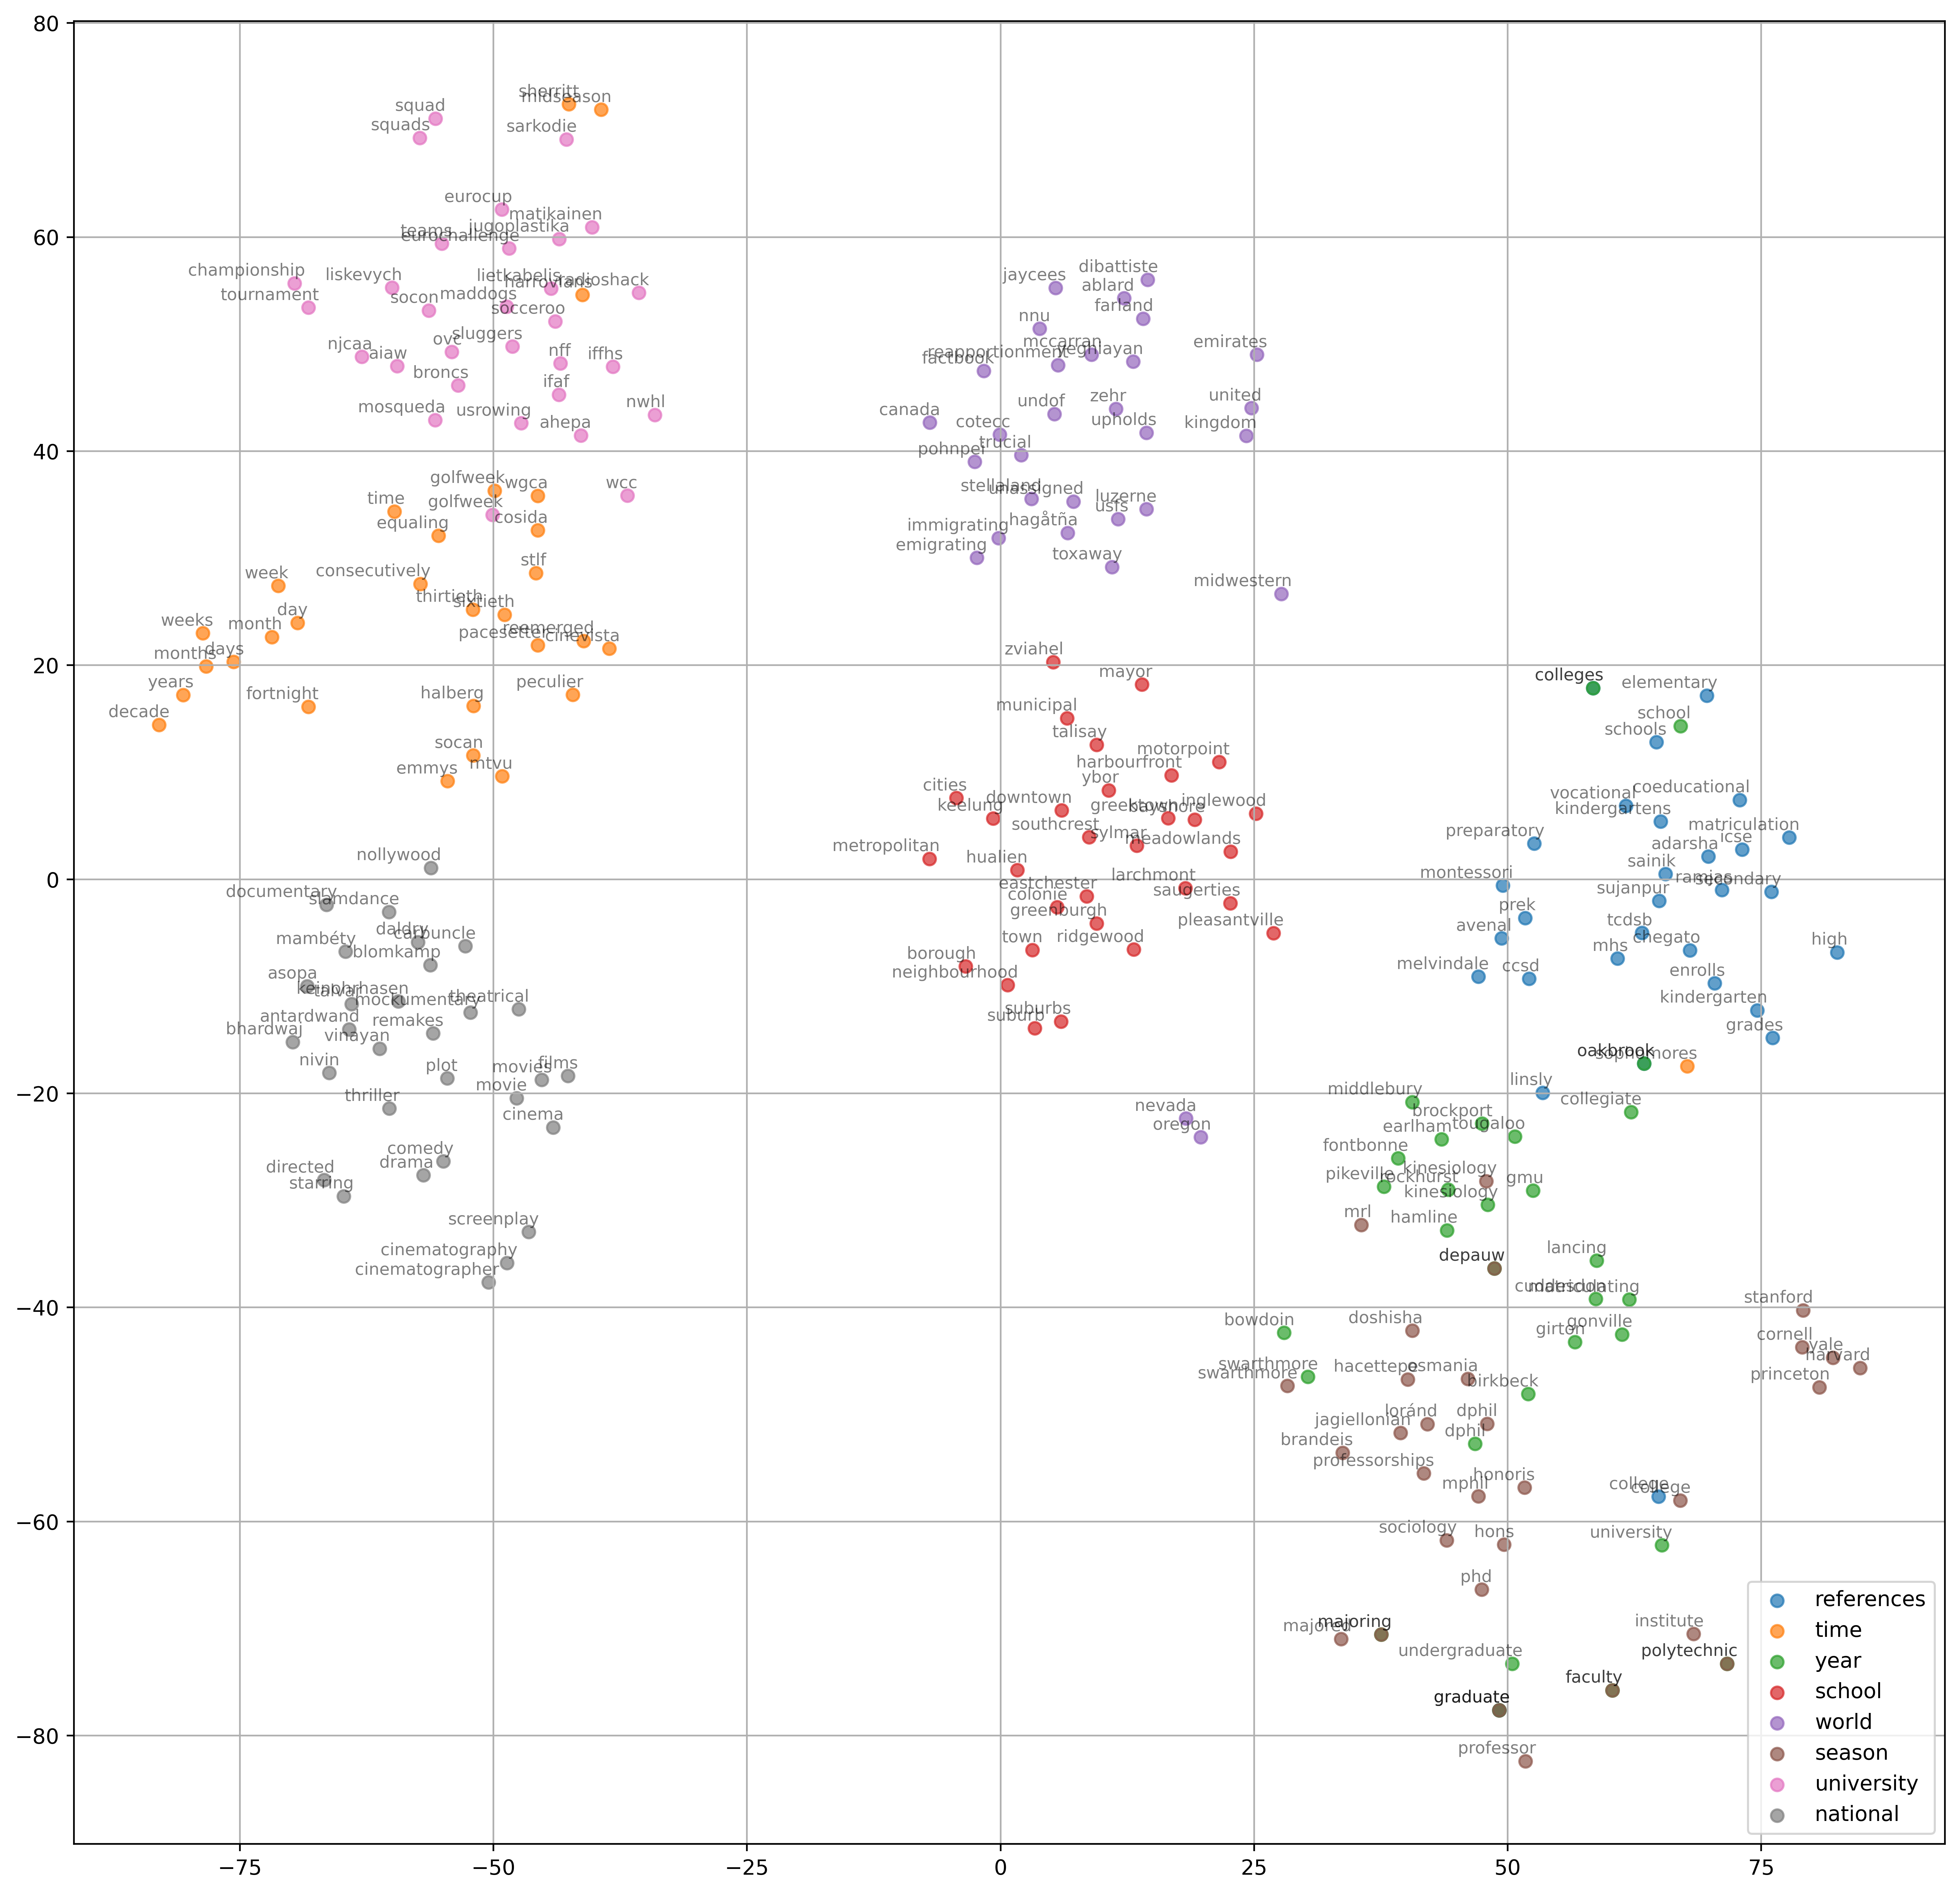

In [10]:
print('perplexity :',10)
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)